In [1]:
import numpy as np
import pandas as pd
import nbimporter 
import matrix_factorization
np.random.seed(0)

Importing Jupyter notebook from matrix_factorization.ipynb


In [2]:
# Downloading Movielens-100k
!curl -O http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip ml-100k.zip
!cd ml-100k/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 4808k    0 23081    0     0  31704      0  0:02:35 --:--:--  0:02:35 31661
 25 4808k   25 1207k    0     0   690k      0  0:00:06  0:00:01  0:00:05  690k
 92 4808k   92 4455k    0     0  1615k      0  0:00:02  0:00:02 --:--:-- 1615k
100 4808k  100 4808k    0     0  1730k      0  0:00:02  0:00:02 --:--:-- 1730k
"unzip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [3]:
import zipfile
with zipfile.ZipFile('ml-100k.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [4]:
names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('./ml-100k/u.data', sep='\t', names=names)
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
n_users = df.user_id.unique().shape[0]
n_items = df.item_id.unique().shape[0]
ratings = np.zeros((n_users, n_items))
for row in df.itertuples():
    ratings[row[1]-1, row[2]-1] = row[3]
ratings

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [6]:
ratings.shape

(943, 1682)

In [7]:
def get_sparsity(mat):
    print (str(n_users) + ' users')
    print (str(n_items) + ' items')
    sparsity = float(len(mat.nonzero()[0]))
    sparsity /= (mat.shape[0] * mat.shape[1])
    sparsity *= 100
    return sparsity

In [8]:
print ('Sparsity: {:4.2f}%'.format(get_sparsity(ratings)))

943 users
1682 items
Sparsity: 6.30%


In [9]:
def train_test_split(ratings):
    test = np.zeros(ratings.shape)
    train = ratings.copy()
    for user in range(ratings.shape[0]):
        test_ratings = np.random.choice(ratings[user, :].nonzero()[0], size=10, replace=False)
        train[user, test_ratings] = 0.
        test[user, test_ratings] = ratings[user, test_ratings]
        
    # Test and training are truly disjoint
    assert(np.all((train * test) == 0)) 
    return train, test

In [10]:
train, test = train_test_split(ratings)

In [12]:
MF_SGD = matrix_factorization.ExplicitMF(train, 40, learning='sgd', verbose=True)
# iter_array = [1, 2, 5, 10, 25, 50, 100, 200]

iter_array = [10]
MF_SGD.calculate_learning_curve(iter_array, test, learning_rate=0.001)

Iteration: 10
	current iteration: 10
Train mse: 0.9179901568716773
Test mse: 1.0112001934934836


##################################################################################################################

In [13]:
train.shape

(943, 1682)

In [14]:
test.shape

(943, 1682)

In [15]:
ratings

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [16]:
get_sparsity(ratings)

943 users
1682 items


6.304669364224531

In [17]:
get_sparsity(train)

943 users
1682 items


5.710139043178159

In [18]:
get_sparsity(test)

943 users
1682 items


0.5945303210463734

# ####################################### GANS ###################################################

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils import data as t_data
import torchvision.datasets as datasets
from torchvision import transforms

In [20]:
batch_size = 64

In [21]:
def make_some_noise(batch_size):
    return torch.rand(batch_size,100)

In [22]:
make_some_noise(batch_size)

tensor([[0.2300, 0.3413, 0.7392,  ..., 0.6417, 0.1844, 0.2560],
        [0.9341, 0.2468, 0.7730,  ..., 0.1511, 0.1650, 0.6664],
        [0.8377, 0.4176, 0.4670,  ..., 0.9904, 0.3528, 0.0745],
        ...,
        [0.3069, 0.8710, 0.8922,  ..., 0.2426, 0.8266, 0.1677],
        [0.1162, 0.6417, 0.3077,  ..., 0.5797, 0.0723, 0.5407],
        [0.8169, 0.2697, 0.1867,  ..., 0.8454, 0.2600, 0.9988]])

In [23]:
# defining generator class

class generator(nn.Module):
    
    def __init__(self, inp, out):
        
        super(generator, self).__init__()
        
        self.net = nn.Sequential(
                                 nn.Linear(inp,300),
                                 nn.Tanh(),
                                 nn.Linear(300,1000),
                                 nn.Tanh(),
                                 nn.Linear(1000,800),
                                 nn.Tanh(),
                                 nn.Linear(800,out),
                                 nn.Sigmoid()
                                    )
        
    def forward(self, x):
        x = self.net(x)
        return x*5 # to get values in range [0,5]

In [24]:
# defining discriminator class

class discriminator(nn.Module):
    
    def __init__(self, inp, out):
        
        super(discriminator, self).__init__()
        
        self.net = nn.Sequential(
                                 nn.Linear(inp,300),
                                 nn.Tanh(),
                                 nn.Linear(300,300),
                                 nn.Tanh(),
                                 nn.Linear(300,200),
                                 nn.Tanh(),
                                 nn.Linear(200,out),
                                 nn.Sigmoid()
                                    )
        
    def forward(self, x):
        x = self.net(x)
        return x

In [25]:
dis = discriminator(ratings.shape[1], 1)
gen = generator(100, ratings.shape[1])

In [26]:
dis

discriminator(
  (net): Sequential(
    (0): Linear(in_features=1682, out_features=300, bias=True)
    (1): Tanh()
    (2): Linear(in_features=300, out_features=300, bias=True)
    (3): Tanh()
    (4): Linear(in_features=300, out_features=200, bias=True)
    (5): Tanh()
    (6): Linear(in_features=200, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

In [27]:
gen

generator(
  (net): Sequential(
    (0): Linear(in_features=100, out_features=300, bias=True)
    (1): Tanh()
    (2): Linear(in_features=300, out_features=1000, bias=True)
    (3): Tanh()
    (4): Linear(in_features=1000, out_features=800, bias=True)
    (5): Tanh()
    (6): Linear(in_features=800, out_features=1682, bias=True)
    (7): Sigmoid()
  )
)

In [28]:
d_steps = 300
g_steps = 300

criteriond1 = nn.BCELoss()
optimizerd1 = optim.SGD(dis.parameters(), lr=0.0001, momentum=0.9)

criteriond2 = nn.BCELoss()
optimizerd2 = optim.SGD(gen.parameters(), lr=0.0001, momentum=0.9)

# printing_steps = 200

epochs = 50

In [29]:
def get_random_batch(mat, batch_size=16):
    rand_rows = np.random.randint(mat.shape[0], size=batch_size)
#     print(mat.shape, rand_rows)
#     print(mat[rand_rows].shape)
    return mat[rand_rows]
    
get_random_batch(train)

array([[3., 0., 3., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [3., 2., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
train = torch.autograd.Variable(torch.Tensor(train))

In [31]:
import torch.nn.functional as F
eval_losses = []
for epoch in range(10):
#     print (epoch)

    # training discriminator
    gen.train()
    dis.train()
    for d_step in range(d_steps):
        dis.zero_grad()
        
        # training discriminator on real data
        real_rows = get_random_batch(train, batch_size)
        discriminator_real_outputs = dis(real_rows)
   
        dis_real_loss = criteriond1(discriminator_real_outputs, Variable(torch.ones(batch_size,1)))
    
        dis_real_loss.backward()

        # training discriminator on data produced by generator
        z_vector = make_some_noise(batch_size)
        #output from generator is generated        
        fake_rows = gen(z_vector).detach()
#         print(fake_rows[:20])
        dis_fake_out = dis(fake_rows)
        dis_fake_loss = criteriond1(dis_fake_out, Variable(torch.zeros(batch_size,1)))
        dis_fake_loss.backward()

        optimizerd1.step()
        
    # training generator
    for g_step in range(g_steps):
        gen.zero_grad()
        
        #generating data for input for generator
        z_vector = make_some_noise(batch_size)
        
        fake_rows = gen(z_vector)
#         print(fake_rows.shape, z_vector.shape)
#         print(fake_rows[:20])
        dis_out_gen_training = dis(fake_rows)
        gen_loss = criteriond2(dis_out_gen_training, Variable(torch.ones(batch_size,1)))
        gen_loss.backward()
        
        optimizerd2.step()

    # evaluation
    if epoch % 10: # todo- to change
        gen.eval()
        z_vector_eval = make_some_noise(128)
        fake_rows_eval = gen(z_vector_eval)
        real_rows_eval = get_random_batch(train, 128)
#         print(fake_rows[0][:10]) enable to see some results
        eval_loss = F.mse_loss(fake_rows_eval, real_rows_eval, reduction='sum')
        eval_losses.append(eval_loss)
        print('Epoch number {}. MSE distance between random real and fake samples {}'.format(epoch, eval_loss))
#         print('Epoch number {}. L1 distance between random real and fake samples {}'.format(epoch, torch.sum(torch.abs(fake_rows_eval - real_rows_eval))))
        

Epoch number 1. MSE distance between random real and fake samples 1285974.875
Epoch number 2. MSE distance between random real and fake samples 1274974.375
Epoch number 3. MSE distance between random real and fake samples 1255699.75
Epoch number 4. MSE distance between random real and fake samples 1206678.375
Epoch number 5. MSE distance between random real and fake samples 1125096.75
Epoch number 6. MSE distance between random real and fake samples 966762.4375
Epoch number 7. MSE distance between random real and fake samples 813268.0625
Epoch number 8. MSE distance between random real and fake samples 674719.125
Epoch number 9. MSE distance between random real and fake samples 552095.8125


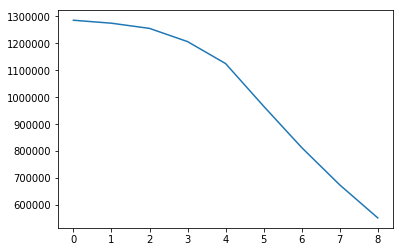

In [32]:
import matplotlib.pyplot as plt

plt.plot(eval_losses)
plt.show()

In [33]:
z_vector = make_some_noise(16)
fake_rows = gen(z_vector)

In [34]:
# as we see generator produces very similar vectors 
fake_rows[:,:9]

tensor([[4.9704, 2.4100, 0.3341, 4.0462, 0.2697, 0.1100, 4.7857, 4.4930, 4.9137],
        [4.9700, 2.4031, 0.3407, 4.0472, 0.2714, 0.1119, 4.7822, 4.4873, 4.9119],
        [4.9693, 2.3915, 0.3448, 4.0386, 0.2727, 0.1137, 4.7808, 4.4796, 4.9104],
        [4.9703, 2.4093, 0.3389, 4.0421, 0.2706, 0.1108, 4.7841, 4.4905, 4.9125],
        [4.9706, 2.4203, 0.3376, 4.0437, 0.2697, 0.1095, 4.7844, 4.4912, 4.9131],
        [4.9696, 2.3951, 0.3416, 4.0383, 0.2712, 0.1122, 4.7828, 4.4831, 4.9124],
        [4.9702, 2.3928, 0.3390, 4.0486, 0.2705, 0.1107, 4.7819, 4.4858, 4.9126],
        [4.9694, 2.4019, 0.3404, 4.0364, 0.2729, 0.1118, 4.7815, 4.4865, 4.9111],
        [4.9693, 2.3953, 0.3417, 4.0438, 0.2732, 0.1115, 4.7798, 4.4816, 4.9109],
        [4.9711, 2.3968, 0.3345, 4.0512, 0.2670, 0.1091, 4.7873, 4.4938, 4.9151],
        [4.9698, 2.4067, 0.3389, 4.0431, 0.2725, 0.1117, 4.7829, 4.4872, 4.9115],
        [4.9707, 2.4015, 0.3348, 4.0463, 0.2677, 0.1093, 4.7849, 4.4944, 4.9137],
        [4.9705,

In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision.utils as vutils
from torch.autograd import Variable
import torch.nn.init as init
from os.path import isfile, isdir, join
import os
# from tensorboard_logger import configure, log_value

In [60]:
lrD = 5e-4
lrG = 5e-4
batch_size = 100
cuda = True
epochs = 1000
device = 5
seed = 42
nz = 100
d_iter = 5
g_iter = 1
lamba = 1e-2 # constant for L2 penalty (diversity)
name = "mnist-experiment"
# configure("runs/run-" + args.name, flush_secs=5)
torch.manual_seed(seed)
if cuda:
#     torch.cuda.set_device('cuda')
    torch.cuda.manual_seed(seed)
data_loader = torch.utils.data.DataLoader(
datasets.MNIST('../data', train=True, download=True,
transform=transforms.Compose([transforms.ToTensor(),])), batch_size=batch_size, shuffle=True)

In [61]:
class NetD(torch.nn.Module):
    def __init__(self, use_cuda=True):
        super(NetD, self).__init__()
        self.use_cuda = use_cuda
        # top
        self.t1 = torch.nn.Linear(28 * 28, 1024)
        # bottom
        self.b1 = torch.nn.Linear(28 * 28, 1024)
        # combined
        self.fc = torch.nn.Linear(2 * 1024, 28 * 28)
    def forward(self, xr, xf):
        # get filt
        filt = 1 - (xr * (xf >= 0.5).float()) - ((1-xr) * (xf < 0.5).float())
        # random swap
        idr = torch.multinomial(torch.Tensor([0.5,0.5]), xr.size(0), replacement=True)
        idrx = idr.float().unsqueeze(1).expand_as(xr)
        if self.use_cuda: idrx = idrx.cuda()
        idrx = Variable(idrx)
        xt = xr * idrx + xf * (1 - idrx)
        xb = xr * (1 - idrx) + xf * idrx
        # top : real
        xt = F.relu(self.t1(xt))
        # bottom : fake
        xb = F.relu(self.b1(xb))
        # combined
        x = torch.cat((xt, xb), 1)
        x = F.tanh(self.fc(x))
        # apply filter, aggregate
        x = filt * x
        x = x.mean(dim = 1).squeeze()
        # use sign, because of swapping
        sgn = idr * 2 - 1
        if self.use_cuda: sgn = sgn.cuda()
        sgn = Variable(sgn.float())
        x = sgn * x
        return x

In [62]:
# latent_vec_size = 100
# vec_size = 1000

netG = torch.nn.Sequential(
    torch.nn.Linear(nz, 1024),
    torch.nn.ReLU(),
    torch.nn.Linear(1024, 28 * 28),
    torch.nn.Sigmoid()
    )

In [64]:
# networks
netD = NetD()
print(netG)
print(netD)
optimizerG = optim.RMSprop(netG.parameters(), lr=lrG)
optimizerD = optim.RMSprop(netD.parameters(), lr=lrD)
one = torch.FloatTensor([1])
mone = one * -1

Sequential(
  (0): Linear(in_features=100, out_features=1024, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1024, out_features=784, bias=True)
  (3): Sigmoid()
)
NetD(
  (t1): Linear(in_features=784, out_features=1024, bias=True)
  (b1): Linear(in_features=784, out_features=1024, bias=True)
  (fc): Linear(in_features=2048, out_features=784, bias=True)
)


In [65]:
one = torch.FloatTensor([1])
mone = one * -1

if cuda is True:
    netD.cuda()
    netG.cuda()
    one, mone = one.cuda(), mone.cuda()

In [82]:
for p in netD.parameters(): # reset requires_grad
    p.requires_grad = True #
    
for p in netG.parameters(): # reset requires_grad
    p.requires_grad = True #

In [ ]:
gen_iterations = 0
for epoch in range(epochs):
    data_iter = iter(data_loader)
    i = 0
    while i < len(data_loader):
        ############################
        # (1) Update D network
        ###########################
#         for p in netD.parameters(): # reset requires_grad
#             p.requires_grad = True # they are set to False below in netG update
        d_iter = d_iter
        j = 0
        while j < d_iter and i < len(data_loader):
            j += 1
            # load real data
            i += 1
            X, _ = data_iter.next()
            X = X.view(X.size(0), -1)
            X = (X >= 0.5).float()
            if cuda: 
                X = X.cuda()
            real = Variable(X)
            # generate fake data
            noise = torch.randn(batch_size, nz)
            if cuda: 
                noise = noise.cuda()
            noisev = Variable(noise, volatile = True) # totally freeze netG
            fake = Variable(netG(noisev).data, requires_grad=True)
            # compute gradient, take step
            netD.zero_grad()
            out = netD(real, fake)
            outputD = torch.mean(out) + lamba * out.norm()
            stdD = torch.std(out)
            outputD.backward(mone)
            optimizerD.step()

            g_iter = g_iter
            j = 0
            while j < g_iter and i < len(data_loader):
                j += 1
            for p in netD.parameters():
                p.requires_grad = False # to avoid computation
                netG.zero_grad()
                # load real data
                i += 1
                X, _ = data_iter.next()
                X = X.view(X.size(0), -1)
                X = (X >= 0.5).float()
                if cuda: X = X.cuda()
                real = Variable(X)
                # update generator
                noise = torch.randn(batch_size, nz)
                if cuda: 
                    noise = noise.cuda()
                noisev = Variable(noise)
                fake = netG(noisev)
                out = netD(real, fake)
                outputG = torch.mean(out) + lamba * out.norm()
                stdG = torch.std(out)
                outputG.backward(one)
                optimizerG.step()
                gen_iterations += 1

            print('[%d/%d][%d/%d][%d] Loss_D: %f Loss_G: %f ' % (epoch, epochs, i, len(data_loader), gen_iterations, outputD.data.item(), outputG.data.item()))
            print('output_D', outputD.data.item(), gen_iterations)
            print('output_G', outputG.data.item(), gen_iterations)
            print('std_D', stdD.data.item(), gen_iterations)
            print('std_G', stdG.data.item(), gen_iterations)
            if gen_iterations % 10 == 0:
                if not isdir('./images/{0}'.format(name)):
                    os.mkdir('./images/{0}'.format(name))
                real = real.data[0:100,:]
                real = real.view(real.size(0), 1, 28, 28)
                vutils.save_image(real, './images/{0}/real_samples.png'.format(name, gen_iterations))
                noise = torch.randn(min(100, batch_size), nz)
                if cuda: 
                    noise = noise.cuda()
                fake = netG(Variable(noise, volatile=True))
                # fake = (fake.data >= 0.5).float()
                R = torch.rand(fake.size())
                fake = (fake.data.cpu() >= R).float()
                fake = fake.view(fake.size(0), 1, 28, 28)
                vutils.save_image(fake, './images/{0}/fake_samples_{1}.png'.format(name, gen_iterations))

            # do checkpointing
            if not isdir('./checkpoint/{0}'.format(name)):
                os.mkdir('./checkpoint/{0}'.format(name))
            torch.save(netG.state_dict(), './checkpoint/{0}/netG_epoch_{1}.pth'.format(name, epoch))
            torch.save(netD.state_dict(), './checkpoint/{0}/netD_epoch_{1}.pth'.format(name, epoch))


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][7/600][6] Loss_D: -0.018664 Loss_G: -0.044381 
output_D -0.018663575872778893 6
output_G -0.044380880892276764 6
std_D 0.16066080331802368 6
std_G 0.15643088519573212 6


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][14/600][12] Loss_D: -0.044244 Loss_G: -0.052370 
output_D -0.04424428567290306 12
output_G -0.05237041413784027 12
std_D 0.1519104391336441 12
std_G 0.15057604014873505 12


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][21/600][18] Loss_D: -0.039717 Loss_G: -0.007038 
output_D -0.03971653804183006 18
output_G -0.0070381686091423035 18
std_D 0.1511300504207611 18
std_G 0.15869835019111633 18


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][28/600][24] Loss_D: -0.028912 Loss_G: -0.046518 
output_D -0.02891172282397747 24
output_G -0.046517807990312576 24
std_D 0.15942604839801788 24
std_G 0.1523265242576599 24


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][35/600][30] Loss_D: -0.001672 Loss_G: -0.012118 
output_D -0.00167163647711277 30
output_G -0.01211794838309288 30
std_D 0.15479740500450134 30
std_G 0.15742528438568115 30


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David

[0/1000][42/600][36] Loss_D: -0.040454 Loss_G: -0.042593 
output_D -0.04045399650931358 36
output_G -0.04259338229894638 36
std_D 0.15386982262134552 36
std_G 0.15466339886188507 36


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][49/600][42] Loss_D: -0.024038 Loss_G: -0.022949 
output_D -0.024037636816501617 42
output_G -0.022949062287807465 42
std_D 0.1582157164812088 42
std_G 0.1516599953174591 42


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][56/600][48] Loss_D: -0.034375 Loss_G: -0.015654 
output_D -0.03437545895576477 48
output_G -0.01565377786755562 48
std_D 0.15362226963043213 48
std_G 0.15420334041118622 48


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][63/600][54] Loss_D: -0.036171 Loss_G: -0.026037 
output_D -0.036171019077301025 54
output_G -0.02603657729923725 54
std_D 0.1508193165063858 54
std_G 0.15370188653469086 54


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][70/600][60] Loss_D: -0.020049 Loss_G: -0.031006 
output_D -0.02004946768283844 60
output_G -0.03100554272532463 60
std_D 0.15803568065166473 60
std_G 0.15285439789295197 60


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David

[0/1000][77/600][66] Loss_D: -0.015026 Loss_G: -0.030330 
output_D -0.015025690197944641 66
output_G -0.030330302193760872 66
std_D 0.1544981151819229 66
std_G 0.15594783425331116 66


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][84/600][72] Loss_D: -0.032320 Loss_G: -0.000876 
output_D -0.032320357859134674 72
output_G -0.0008761249482631683 72
std_D 0.1500314474105835 72
std_G 0.1510974019765854 72


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][91/600][78] Loss_D: -0.028789 Loss_G: -0.017320 
output_D -0.028789453208446503 78
output_G -0.01732034422457218 78
std_D 0.15751783549785614 78
std_G 0.15617378056049347 78


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][98/600][84] Loss_D: -0.019802 Loss_G: -0.016516 
output_D -0.019801804795861244 84
output_G -0.016516495496034622 84
std_D 0.15725217759609222 84
std_G 0.15202993154525757 84


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][105/600][90] Loss_D: -0.030774 Loss_G: -0.057753 
output_D -0.030774107202887535 90
output_G -0.05775310844182968 90
std_D 0.1604919284582138 90
std_G 0.15268957614898682 90


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David

[0/1000][112/600][96] Loss_D: -0.026422 Loss_G: -0.034138 
output_D -0.02642206847667694 96
output_G -0.034137848764657974 96
std_D 0.15690600872039795 96
std_G 0.1494336873292923 96


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][119/600][102] Loss_D: -0.074749 Loss_G: -0.063667 
output_D -0.07474885135889053 102
output_G -0.06366680562496185 102
std_D 0.14156293869018555 102
std_G 0.15093708038330078 102


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][126/600][108] Loss_D: -0.067721 Loss_G: -0.031415 
output_D -0.06772074103355408 108
output_G -0.031414687633514404 108
std_D 0.15033961832523346 108
std_G 0.15254820883274078 108


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][133/600][114] Loss_D: -0.024722 Loss_G: 0.005311 
output_D -0.02472168207168579 114
output_G 0.005311227403581142 114
std_D 0.15838371217250824 114
std_G 0.15130503475666046 114


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][140/600][120] Loss_D: -0.006712 Loss_G: -0.024691 
output_D -0.006711645983159542 120
output_G -0.024691220372915268 120
std_D 0.15138967335224152 120
std_G 0.15448632836341858 120


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David

[0/1000][147/600][126] Loss_D: -0.039618 Loss_G: -0.041014 
output_D -0.03961773216724396 126
output_G -0.04101408272981644 126
std_D 0.1544724553823471 126
std_G 0.15434232354164124 126


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][154/600][132] Loss_D: -0.020281 Loss_G: -0.050746 
output_D -0.02028142288327217 132
output_G -0.05074567347764969 132
std_D 0.15897195041179657 132
std_G 0.14856405556201935 132


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][161/600][138] Loss_D: -0.027153 Loss_G: -0.025588 
output_D -0.027153337374329567 138
output_G -0.025587590411305428 138
std_D 0.1609879434108734 138
std_G 0.15380406379699707 138


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][168/600][144] Loss_D: -0.027867 Loss_G: -0.037176 
output_D -0.027866864576935768 144
output_G -0.03717615082859993 144
std_D 0.1592075228691101 144
std_G 0.16015838086605072 144


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][175/600][150] Loss_D: -0.032691 Loss_G: 0.000616 
output_D -0.03269091248512268 150
output_G 0.0006164927035570145 150
std_D 0.15746980905532837 150
std_G 0.16307561099529266 150


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David

[0/1000][182/600][156] Loss_D: -0.026956 Loss_G: -0.022544 
output_D -0.026956064626574516 156
output_G -0.022543644532561302 156
std_D 0.15468664467334747 156
std_G 0.15772698819637299 156


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][189/600][162] Loss_D: -0.036119 Loss_G: -0.028340 
output_D -0.036118507385253906 162
output_G -0.028339648619294167 162
std_D 0.157565638422966 162
std_G 0.1547413319349289 162


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][196/600][168] Loss_D: -0.022691 Loss_G: -0.020330 
output_D -0.022691303864121437 168
output_G -0.02033041976392269 168
std_D 0.15407942235469818 168
std_G 0.16094379127025604 168


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][203/600][174] Loss_D: 0.002609 Loss_G: -0.042963 
output_D 0.0026087304577231407 174
output_G -0.042963430285453796 174
std_D 0.14803965389728546 174
std_G 0.15629445016384125 174


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][210/600][180] Loss_D: -0.040476 Loss_G: 0.002676 
output_D -0.04047585278749466 180
output_G 0.0026755807921290398 180
std_D 0.14834515750408173 180
std_G 0.14963729679584503 180


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David

[0/1000][217/600][186] Loss_D: -0.005806 Loss_G: -0.045570 
output_D -0.005805619060993195 186
output_G -0.0455702468752861 186
std_D 0.158280149102211 186
std_G 0.14677245914936066 186


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][224/600][192] Loss_D: -0.023295 Loss_G: -0.039996 
output_D -0.023294666782021523 192
output_G -0.039996251463890076 192
std_D 0.15392301976680756 192
std_G 0.14775149524211884 192


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][231/600][198] Loss_D: -0.004098 Loss_G: -0.009435 
output_D -0.0040982309728860855 198
output_G -0.009435350075364113 198
std_D 0.15343618392944336 198
std_G 0.15178729593753815 198


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][238/600][204] Loss_D: 0.006184 Loss_G: -0.050113 
output_D 0.006184127181768417 204
output_G -0.05011322349309921 204
std_D 0.15329432487487793 204
std_G 0.15104033052921295 204


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][245/600][210] Loss_D: -0.003788 Loss_G: -0.022335 
output_D -0.003787551075220108 210
output_G -0.022334758192300797 210
std_D 0.16348184645175934 210
std_G 0.15527960658073425 210


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David

[0/1000][252/600][216] Loss_D: -0.012295 Loss_G: -0.059541 
output_D -0.012294975109398365 216
output_G -0.0595412440598011 216
std_D 0.14763782918453217 216
std_G 0.14716173708438873 216


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][259/600][222] Loss_D: -0.029984 Loss_G: -0.019137 
output_D -0.029984384775161743 222
output_G -0.01913687214255333 222
std_D 0.15282393991947174 222
std_G 0.15821215510368347 222


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][266/600][228] Loss_D: -0.030919 Loss_G: -0.077330 
output_D -0.030919453129172325 228
output_G -0.0773295909166336 228
std_D 0.15660925209522247 228
std_G 0.14258447289466858 228


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][273/600][234] Loss_D: -0.020548 Loss_G: -0.024831 
output_D -0.020547550171613693 234
output_G -0.024831252172589302 234
std_D 0.1584167182445526 234
std_G 0.15644295513629913 234


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][280/600][240] Loss_D: 0.001815 Loss_G: -0.047320 
output_D 0.0018150946125388145 240
output_G -0.04731987044215202 240
std_D 0.16074420511722565 240
std_G 0.1550576239824295 240


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David

[0/1000][287/600][246] Loss_D: 0.010020 Loss_G: -0.043994 
output_D 0.010020162910223007 246
output_G -0.043994247913360596 246
std_D 0.1530671864748001 246
std_G 0.1520143747329712 246


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][294/600][252] Loss_D: -0.022656 Loss_G: -0.039622 
output_D -0.02265588939189911 252
output_G -0.03962187096476555 252
std_D 0.15145309269428253 252
std_G 0.1509617269039154 252


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][301/600][258] Loss_D: -0.030363 Loss_G: -0.038467 
output_D -0.030362652614712715 258
output_G -0.03846670687198639 258
std_D 0.15204879641532898 258
std_G 0.15545745193958282 258


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][308/600][264] Loss_D: -0.029857 Loss_G: -0.018937 
output_D -0.029857361689209938 264
output_G -0.018937019631266594 264
std_D 0.15690003335475922 264
std_G 0.15908272564411163 264


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][315/600][270] Loss_D: -0.036360 Loss_G: -0.012473 
output_D -0.036360353231430054 270
output_G -0.012473009526729584 270
std_D 0.15483969449996948 270
std_G 0.15512430667877197 270


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David

[0/1000][322/600][276] Loss_D: -0.029315 Loss_G: -0.033663 
output_D -0.029314571991562843 276
output_G -0.03366316482424736 276
std_D 0.1515554040670395 276
std_G 0.15385477244853973 276


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan

[0/1000][329/600][282] Loss_D: -0.009375 Loss_G: -0.027885 
output_D -0.00937546044588089 282
output_G -0.02788463607430458 282
std_D 0.15710535645484924 282
std_G 0.1519976258277893 282


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\David\Anaconda3\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tan